<a href="https://colab.research.google.com/github/RishabBha0428/loadsmart-notebooks/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/DC_Loadsmart_Team/UpdatedLoadsmartData.gz',
    compression="gzip",
    header=0,
    escapechar="\\"
)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,19,22,23,24,26,27,29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,quote_date,quote_id,quote_channel,intyegration,is_booked,shipper_id,shipper_size,quote_manual_overwrite,pu_zip3,del_zip3,...,source_date,sourced_price,sourcing_methd,sourcing_channel,carrier_id,carrier_state,carrier_city,carrier_regiom,carrier_fleet_size,carrier_number_drivers
0,2020-01-03 05:36:49.499,16812080,ab-drt-service,NaN,t,1375,ULE,auto,770,731,...,NaN,NaN,NaN,NaN,75921.0,OK,Oklahoma City,Great Plains,national,1030.0
1,2020-01-03 12:39:34.914,16829749,ab-drt-service,NaN,t,1375,ULE,auto,631,582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 08:32:20.468,16972470,alice,integration,t,2751,ULE,auto,172,180,...,2020-01-06 11:57:31,550.0,manual,alice,961149.0,IN,Valparaiso,Midwest,medium,97.0
3,2020-01-06 09:05:35.432,16973634,ab-drt-service,NaN,t,1375,ULE,auto,805,585,...,2020-01-07 10:39:03.818,1350.0,NaN,alice,54470.0,ND,Mapleton,Midwest,medium,208.0
4,2020-01-06 07:15:44.816,16969737,ab-drt-service,NaN,t,1375,ULE,auto,631,587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#isbook
df = df[df['is_booked'] == 't']

#drop ecoh_alg_price nan
# df = df[~df.ecoh_algorithm_price.isna()]
len(df)

172854

In [ ]:
df.columns

Index(['quote_date', 'quote_id', 'quote_channel', 'intyegration', 'is_booked',
       'shipper_id', 'shipper_size', 'quote_manual_overwrite', 'pu_zip3',
       'del_zip3', 'pu_kma', 'del_kma', 'kma_lane', 'pu_state', 'del_state',
       'miles', 'equip_type', 'ecoh_algorithm_price', 'book_date',
       'delivery_date', 'quote_price', 'original_pickup_at_quote',
       'final_pickup', 'commodity', 'source_date', 'sourced_price',
       'sourcing_methd', 'sourcing_channel', 'carrier_id', 'carrier_state',
       'carrier_city', 'carrier_regiom', 'carrier_fleet_size',
       'carrier_number_drivers'],
      dtype='object')

In [ ]:
features_df = df[['quote_price',]]
features_df

,quote_price
0,956.62
1,2633.00
2,662.85
3,1855.62
4,2499.12
...,...
175160,2970.02
175161,994.96
175162,763.36
175163,1274.00


In [ ]:
type(df['original_pickup_at_quote'])

pandas.core.series.Series

In [ ]:
price_diff = df['original_pickup_at_quote'].compare(df['quote_date'])

In [ ]:
price_diff

,self,other
0,2020-01-08 13:00:00,2020-01-03 05:36:49.499
1,2020-01-07 13:00:00,2020-01-03 12:39:34.914
2,2020-01-08 15:00:00,2020-01-06 08:32:20.468
3,2020-01-09 07:01:00,2020-01-06 09:05:35.432
4,2020-01-09 07:00:00,2020-01-06 07:15:44.816
...,...,...
175160,2022-09-20 14:00:00,2022-09-20 10:26:21.076
175161,2022-09-21 12:00:00,2022-09-20 12:10:32.084
175162,2022-09-21 12:00:00,2022-09-20 12:48:42.432
175163,2022-09-27 19:42:16,2022-09-20 16:42:18.052


In [ ]:
{k : len(df[k].unique()) for k in ['shipper_size', 'pu_kma', 'del_kma', 'pu_state', 'del_state', 'sourcing_channel']}

{'shipper_size': 5,
 'pu_kma': 137,
 'del_kma': 137,
 'pu_state': 55,
 'del_state': 59,
 'sourcing_channel': 24}

In [ ]:
#normalize
from sklearn.preprocessing import normalize

X = features_df.drop(columns = 'sourcing_channel')
nor = normalize(X)
features = X.columns
nor_df = pd.DataFrame(nor, columns = features)
nor_df

ValueError: ignored

In [ ]:
# df_dummies = pd.get_dummies(df[['shipper_size', 'quote_manual_overwrite', 'equip_type', 'carrier_regiom', 'carrier_fleet_size']], dummy_na = True)
# df_dummies['sourcing_channel'] = df['sourcing_channel']
# #df_dummies.groupby('sourcing_channel').size()

In [ ]:
# df.columns

Index(['quote_date', 'quote_id', 'quote_channel', 'intyegration', 'is_booked',
       'shipper_id', 'shipper_size', 'quote_manual_overwrite', 'pu_zip3',
       'del_zip3', 'pu_kma', 'del_kma', 'kma_lane', 'pu_state', 'del_state',
       'miles', 'equip_type', 'ecoh_algorithm_price', 'book_date',
       'delivery_date', 'quote_price', 'original_pickup_at_quote',
       'final_pickup', 'commodity', 'source_date', 'sourced_price',
       'sourcing_methd', 'sourcing_channel', 'carrier_id', 'carrier_state',
       'carrier_city', 'carrier_regiom', 'carrier_fleet_size',
       'carrier_number_drivers'],
      dtype='object')

In [ ]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)
df_groupby = df[['miles', 'ecoh_algorithm_price', 'quote_price', 'sourced_price', 'carrier_number_drivers', 'sourcing_channel']].groupby('sourcing_channel').agg(['mean', q1, q3])
df_groupby['size'] = df_dummies.groupby('sourcing_channel').size()
df_groupby = df_groupby.reset_index()
df_groupby

sourcing_channel       miles                        \
                               mean         q1         q3   
0                 alice  752.365747  263.70000  1027.2685   
1      amazon_automatic  386.174071   88.70000   625.1300   
2        amazon_freight  167.500000  167.50000   167.5000   
3   amazon_freight_spot  312.996108  108.92500   462.2945   
4           cloudtrucks  495.171353  198.15000   516.3230   
5                kamion  776.000000  776.00000   776.0000   
6           keeptruckin  478.348750  224.08800   550.2500   
7         loadsmart.com  698.712183  304.00325   946.0000   
8            mobile-app  479.591883  179.17500   630.2250   
9               newtrul  642.584500  363.66800   891.6750   
10             smarthop  687.375000  518.92500   736.0500   
11              spotter  545.700000  367.35000   724.0500   
12            truckstop  532.311300  195.30000   722.0750   

   ecoh_algorithm_price                    quote_price                        \
                   mean       q1       q3         mean         q1         q3   
0           1926.635217   901.00  2583.33  2063.201120   977.4775  2737.9050   
1            244.156429    54.65   402.70   920.010714   489.4300  1282.9475   
2            622.625000   600.00   652.00   625.490000   606.0000   657.2525   
3            866.779846   584.00  1033.50   970.329769   643.9100  1229.6575   
4           1365.878627   764.50  1431.00  1401.890784   795.5000  1486.8350   
5           2382.000000  2382.00  2382.00  2518.170000  2518.1700  2518.1700   
6           1337.000000   778.75  1626.25  1461.203750   852.1350  1734.4200   
7           1763.502144   960.25  2321.75  1870.906687  1011.7100  2402.7100   
8           1414.039345   744.75  1721.50  1491.913586   784.8425  1838.0525   
9           1338.180000   674.50  2058.25  1604.040000  1004.7450  2168.8675   
10          1707.750000  1461.75  1868.50  1916.955000  1677.9000  2008.0600   
11          1428.000000  1242.00  1614.00  1496.985000  1318.4775  1675.4925   
12          1443.557538   865.00  1855.00  1549.534077   925.2750  1973.2675   

   sourced_price                      carrier_number_drivers           \
            mean         q1        q3                   mean       q1   
0    1975.825231   900.0000  2650.000             382.286240      1.0   
1     839.181429   440.9300  1181.455           23328.000000  23328.0   
2     600.000000   600.0000   600.000           23328.000000  23328.0   
3     775.541846   492.9075   980.215           23328.000000  23328.0   
4    1330.176471   706.0000  1525.000             400.000000    400.0   
5    2316.720000  2316.7200  2316.720              11.000000     11.0   
6    1380.375000   712.7500  1524.250              20.000000      1.0   
7    1745.036752   937.0000  2300.000            1214.385647      1.0   
8    1417.163793   750.0000  1750.000              17.614853      1.0   
9    1350.500000   824.5000  1775.000             301.333333    167.0   
10   1701.750000  1351.7500  1801.000              21.500000      1.5   
11   1602.000000  1476.0000  1728.000              15.000000      7.5   
12   1468.500000   822.0000  1800.000               7.584615      1.0   

             size  
         q3        
0      57.0  7646  
1   23328.0    14  
2   23328.0     8  
3   23328.0   130  
4     400.0    51  
5      11.0     1  
6       3.0     8  
7     268.0  2994  
8       2.0   580  
9     249.5     6  
10     42.0     4  
11     22.5     2  
12      6.0   130

In [ ]:
#df['sourcing_channel'].isnull().sum(), len(df['sourcing_channel'])

In [ ]:

# df['sourcing_channel_num'] = pd.factorize(df.sourcing_channel)[0] + 1
# df[['sourcing_channel', 'sourcing_channel_num']]

# true_labels = df['sourcing_channel_num']

In [ ]:
#drop null
# df_dropna = df[~df.sourcing_channel.isna()]
# df_dropna.columns

In [ ]:
#drop all the date columns
# not_use_features = ['quote_date', 'source_date', 'quote_id', 'delivery_date', 'book_date', 'shipper_id', 'carrier_id', 'final_pickup', 'original_pickup_at_quote']
# df_drop = df_dropna.drop(columns = not_use_features)


In [ ]:
# #replace nan with none
# df_replace = df_drop.replace(np.nan, 'none', regex = True)
# df_replace = df_replace.sample(n = 10000)


In [ ]:
# #one-hot encoding
# df_dummy = pd.get_dummies(df_replace.drop(columns = ['sourcing_channel', 'sourcing_channel_num']))

In [ ]:
#normalize
from sklearn.preprocessing import normalize

X = df_groupby.drop(columns = 'sourcing_channel')
nor = normalize(X)
features = X.columns
nor_df = pd.DataFrame(nor, columns = features)
nor_df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


miles                     ecoh_algorithm_price                      \
        mean        q1        q3                 mean        q1        q3   
0   0.076811  0.026922  0.104876             0.196694  0.091985  0.263737   
1   0.009541  0.002191  0.015444             0.006032  0.001350  0.009949   
2   0.004141  0.004141  0.004141             0.015393  0.014834  0.016119   
3   0.007729  0.002690  0.011416             0.021405  0.014422  0.025522   
4   0.128136  0.051276  0.133610             0.353450  0.197831  0.370302   
5   0.105645  0.105645  0.105645             0.324288  0.324288  0.324288   
6   0.118747  0.055628  0.136596             0.331901  0.193320  0.403706   
7   0.109229  0.047524  0.147887             0.275686  0.150115  0.362957   
8   0.111905  0.041808  0.147053             0.329943  0.173775  0.401684   
9   0.137174  0.077633  0.190348             0.285665  0.143987  0.439380   
10  0.129167  0.097513  0.138314             0.320910  0.274683  0.351117   
11  0.117248  0.078928  0.155567             0.306816  0.266852  0.346779   
12  0.117983  0.043287  0.160042             0.319953  0.191720  0.411146   

   quote_price                     sourced_price                      \
          mean        q1        q3          mean        q1        q3   
0     0.210636  0.099793  0.279518      0.201716  0.091883  0.270544   
1     0.022729  0.012092  0.031696      0.020732  0.010893  0.029188   
2     0.015464  0.014982  0.016249      0.014834  0.014834  0.014834   
3     0.023962  0.015901  0.030366      0.019152  0.012172  0.024206   
4     0.362769  0.205853  0.384750      0.344211  0.182692  0.394626   
5     0.342826  0.342826  0.342826      0.315401  0.315401  0.315401   
6     0.362734  0.211537  0.430558      0.342669  0.176935  0.378385   
7     0.292477  0.158160  0.375613      0.272800  0.146480  0.359557   
8     0.348114  0.183130  0.428879      0.330672  0.175000  0.408334   
9     0.342418  0.214485  0.462994      0.288295  0.176008  0.378914   
10    0.360222  0.315300  0.377342      0.319782  0.254012  0.338433   
11    0.321638  0.283284  0.359991      0.344201  0.317129  0.371273   
12    0.343442  0.205080  0.437359      0.325481  0.182190  0.398956   

   carrier_number_drivers                          size  
                     mean        q1        q3            
0                0.039028  0.000102  0.005819  0.780596  
1                0.576328  0.576328  0.576328  0.000346  
2                0.576728  0.576728  0.576728  0.000198  
3                0.576086  0.576086  0.576086  0.003210  
4                0.103508  0.103508  0.103508  0.013197  
5                0.001498  0.001498  0.001498  0.000136  
6                0.004965  0.000248  0.000745  0.001986  
7                0.189844  0.000156  0.041896  0.468049  
8                0.004110  0.000233  0.000467  0.135333  
9                0.064326  0.035650  0.053261  0.001281  
10               0.004040  0.000282  0.007892  0.000752  
11               0.003223  0.001611  0.004834  0.000430  
12               0.001681  0.000222  0.001330  0.028813

In [ ]:
#Choosing the Appropriate Number of Clusters

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

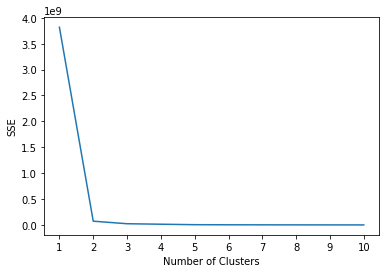

In [ ]:
#plot elbow

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
#best k = 2

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300,  random_state=42)
y_kmeans = kmeans.fit_predict(X)

pred_df = nor_df.copy()
pred_df['pred_sourcing_channel'] = y_kmeans
pred_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


miles                     ecoh_algorithm_price                      \
        mean        q1        q3                 mean        q1        q3   
0   0.076811  0.026922  0.104876             0.196694  0.091985  0.263737   
1   0.009541  0.002191  0.015444             0.006032  0.001350  0.009949   
2   0.004141  0.004141  0.004141             0.015393  0.014834  0.016119   
3   0.007729  0.002690  0.011416             0.021405  0.014422  0.025522   
4   0.128136  0.051276  0.133610             0.353450  0.197831  0.370302   
5   0.105645  0.105645  0.105645             0.324288  0.324288  0.324288   
6   0.118747  0.055628  0.136596             0.331901  0.193320  0.403706   
7   0.109229  0.047524  0.147887             0.275686  0.150115  0.362957   
8   0.111905  0.041808  0.147053             0.329943  0.173775  0.401684   
9   0.137174  0.077633  0.190348             0.285665  0.143987  0.439380   
10  0.129167  0.097513  0.138314             0.320910  0.274683  0.351117   
11  0.117248  0.078928  0.155567             0.306816  0.266852  0.346779   
12  0.117983  0.043287  0.160042             0.319953  0.191720  0.411146   

   quote_price                     sourced_price                      \
          mean        q1        q3          mean        q1        q3   
0     0.210636  0.099793  0.279518      0.201716  0.091883  0.270544   
1     0.022729  0.012092  0.031696      0.020732  0.010893  0.029188   
2     0.015464  0.014982  0.016249      0.014834  0.014834  0.014834   
3     0.023962  0.015901  0.030366      0.019152  0.012172  0.024206   
4     0.362769  0.205853  0.384750      0.344211  0.182692  0.394626   
5     0.342826  0.342826  0.342826      0.315401  0.315401  0.315401   
6     0.362734  0.211537  0.430558      0.342669  0.176935  0.378385   
7     0.292477  0.158160  0.375613      0.272800  0.146480  0.359557   
8     0.348114  0.183130  0.428879      0.330672  0.175000  0.408334   
9     0.342418  0.214485  0.462994      0.288295  0.176008  0.378914   
10    0.360222  0.315300  0.377342      0.319782  0.254012  0.338433   
11    0.321638  0.283284  0.359991      0.344201  0.317129  0.371273   
12    0.343442  0.205080  0.437359      0.325481  0.182190  0.398956   

   carrier_number_drivers                          size pred_sourcing_channel  
                     mean        q1        q3                                  
0                0.039028  0.000102  0.005819  0.780596                     0  
1                0.576328  0.576328  0.576328  0.000346                     1  
2                0.576728  0.576728  0.576728  0.000198                     1  
3                0.576086  0.576086  0.576086  0.003210                     1  
4                0.103508  0.103508  0.103508  0.013197                     0  
5                0.001498  0.001498  0.001498  0.000136                     0  
6                0.004965  0.000248  0.000745  0.001986                     0  
7                0.189844  0.000156  0.041896  0.468049                     0  
8                0.004110  0.000233  0.000467  0.135333                     0  
9                0.064326  0.035650  0.053261  0.001281                     0  
10               0.004040  0.000282  0.007892  0.000752                     0  
11               0.003223  0.001611  0.004834  0.000430                     0  
12               0.001681  0.000222  0.001330  0.028813                     0

In [ ]:
# from sklearn.decomposition import PCA


# pca_model = PCA()
# out = pca_model.fit(scaled_features)
# print(out['topfeat'])

#Questions:
#if our goal is to find the similarity of between channels, can we calculate the distance between two channels, and the one that has the shortest distance is the mosts similar.
# use pca to to above?

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


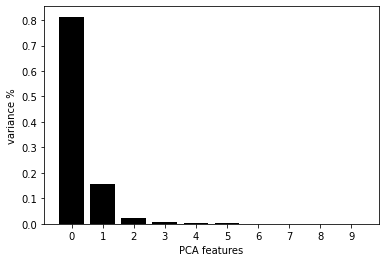

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(nor_df)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
pred_df_mean = pred_df.groupby('pred_sourcing_channel').mean()
pred_df_mean

miles                     ecoh_algorithm_price  \
                           mean        q1        q3                 mean   
pred_sourcing_channel                                                      
0                      0.115204  0.062616  0.141994             0.304531   
1                      0.007137  0.003007  0.010334             0.014277   

                                          quote_price                      \
                             q1        q3        mean        q1        q3   
pred_sourcing_channel                                                       
0                      0.200856  0.367510    0.328728  0.221945  0.387983   
1                      0.010202  0.017197    0.020718  0.014325  0.026104   

                      sourced_price                      \
                               mean        q1        q3   
pred_sourcing_channel                                     
0                          0.308523  0.201773  0.361442   
1                          0.018239  0.012633  0.022743   

                      carrier_number_drivers                          size  
                                        mean        q1        q3            
pred_sourcing_channel                                                       
0                                   0.041622  0.014351  0.022125  0.143057  
1                                   0.576380  0.576380  0.576380  0.001251

In [ ]:
pred_df_median = pred_df.groupby('pred_sourcing_channel').median()
pred_df_median

miles                     ecoh_algorithm_price  \
                           mean        q1        q3                 mean   
pred_sourcing_channel                                                      
0                      0.117615  0.053452  0.142683             0.320431   
1                      0.007729  0.002690  0.011416             0.015393   

                                          quote_price                      \
                             q1        q3        mean        q1        q3   
pred_sourcing_channel                                                       
0                      0.192520  0.366629    0.343134  0.208695  0.381046   
1                      0.014422  0.016119    0.022729  0.014982  0.030366   

                      sourced_price                      \
                               mean        q1        q3   
pred_sourcing_channel                                     
0                          0.322632  0.179563  0.374829   
1                          0.019152  0.012172  0.024206   

                      carrier_number_drivers                          size  
                                        mean        q1        q3            
pred_sourcing_channel                                                       
0                                   0.004538  0.000265  0.005327  0.007592  
1                                   0.576328  0.576328  0.576328  0.000346

In [ ]:
pred_df_mean.columns

MultiIndex([(                 'miles', 'mean'),
            (                 'miles',   'q1'),
            (                 'miles',   'q3'),
            (  'ecoh_algorithm_price', 'mean'),
            (  'ecoh_algorithm_price',   'q1'),
            (  'ecoh_algorithm_price',   'q3'),
            (           'quote_price', 'mean'),
            (           'quote_price',   'q1'),
            (           'quote_price',   'q3'),
            (         'sourced_price', 'mean'),
            (         'sourced_price',   'q1'),
            (         'sourced_price',   'q3'),
            ('carrier_number_drivers', 'mean'),
            ('carrier_number_drivers',   'q1'),
            ('carrier_number_drivers',   'q3'),
            (                  'size',     '')],
           )

In [ ]:
props = []
for i in pred_df_mean.columns:
  prop = pred_df_mean[i] / pred_df_mean[i].sum()
  props.append(prop)
props

[pred_sourcing_channel
 0    0.941663
 1    0.058337
 Name: (miles, mean), dtype: float64, pred_sourcing_channel
 0    0.954172
 1    0.045828
 Name: (miles, q1), dtype: float64, pred_sourcing_channel
 0    0.93216
 1    0.06784
 Name: (miles, q3), dtype: float64, pred_sourcing_channel
 0    0.955218
 1    0.044782
 Name: (ecoh_algorithm_price, mean), dtype: float64, pred_sourcing_channel
 0    0.951663
 1    0.048337
 Name: (ecoh_algorithm_price, q1), dtype: float64, pred_sourcing_channel
 0    0.955299
 1    0.044701
 Name: (ecoh_algorithm_price, q3), dtype: float64, pred_sourcing_channel
 0    0.940711
 1    0.059289
 Name: (quote_price, mean), dtype: float64, pred_sourcing_channel
 0    0.93937
 1    0.06063
 Name: (quote_price, q1), dtype: float64, pred_sourcing_channel
 0    0.936961
 1    0.063039
 Name: (quote_price, q3), dtype: float64, pred_sourcing_channel
 0    0.944182
 1    0.055818
 Name: (sourced_price, mean), dtype: float64, pred_sourcing_channel
 0    0.941079
 1    0

In [ ]:
props = []
for i in pred_df_median.columns:
  prop = pred_df_median[i] / pred_df_median[i].sum()
  props.append(prop)
props

[pred_sourcing_channel
 0    0.938334
 1    0.061666
 Name: (miles, mean), dtype: float64, pred_sourcing_channel
 0    0.952087
 1    0.047913
 Name: (miles, q1), dtype: float64, pred_sourcing_channel
 0    0.925916
 1    0.074084
 Name: (miles, q3), dtype: float64, pred_sourcing_channel
 0    0.954164
 1    0.045836
 Name: (ecoh_algorithm_price, mean), dtype: float64, pred_sourcing_channel
 0    0.930309
 1    0.069691
 Name: (ecoh_algorithm_price, q1), dtype: float64, pred_sourcing_channel
 0    0.957886
 1    0.042114
 Name: (ecoh_algorithm_price, q3), dtype: float64, pred_sourcing_channel
 0    0.937875
 1    0.062125
 Name: (quote_price, mean), dtype: float64, pred_sourcing_channel
 0    0.93302
 1    0.06698
 Name: (quote_price, q1), dtype: float64, pred_sourcing_channel
 0    0.92619
 1    0.07381
 Name: (quote_price, q3), dtype: float64, pred_sourcing_channel
 0    0.943964
 1    0.056036
 Name: (sourced_price, mean), dtype: float64, pred_sourcing_channel
 0    0.936515
 1    0

In [ ]:
#the mean and median of ecoh_algorithm_price, quote price, sourced price is similar